In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
db_data = pd.read_csv('annual_deaths_by_causes.csv')
db_data.columns
colmuns_name = ['pais',
                'codigo',
                'año',
                'por_meningitis',
                'por_alzheimer',
                'por_parkinson',
                'por_deficiencia_nutricional',
                'por_malaria',
                'por_ahogo',
                'por_violencia_interpersonal',
                'por_trastornos_maternos',
                'por_vih_sida',
                'por_uso_drogas',
                'por_tuberculosis',
                'por_enfermedades_cardiovasculares',
                'por_infecciones_respiratorias_leves',
                'por_trastornos_neonatales',
                'por_uso_alcohol',
                'por_autolesiones',
                'por_fuerzas_de_la_naturaleza',
                'por_enfermedades__diarreicas',
                'por_exposicion_al_calor_o_frio',
                'por_neoplasias',
                'por_guerras_terrorismo',
                'por_diabetes_mellitus',
                'por_enfermerdad_renal_cronica',
                'por_envenenamiento',
                'por_desnutricion',
                'por_terrorismo',
                'por_accidentes_de_transito',
                'por_enfermerdades_respirtatorias_cronicas',
                'por_enfermedades_linfaticas_cronicas',
                'por_enfermedades_digestivas',
                'por_sustancias_de_calor_fuego',
                'por_hepatitis_aguda'
                ]

df_causas_muertes = db_data
df_causas_muertes.columns = colmuns_name
db_data.columns

Index(['pais', 'codigo', 'año', 'por_meningitis', 'por_alzheimer',
       'por_parkinson', 'por_deficiencia_nutricional', 'por_malaria',
       'por_ahogo', 'por_violencia_interpersonal', 'por_trastornos_maternos',
       'por_vih_sida', 'por_uso_drogas', 'por_tuberculosis',
       'por_enfermedades_cardiovasculares',
       'por_infecciones_respiratorias_leves', 'por_trastornos_neonatales',
       'por_uso_alcohol', 'por_autolesiones', 'por_fuerzas_de_la_naturaleza',
       'por_enfermedades__diarreicas', 'por_exposicion_al_calor_o_frio',
       'por_neoplasias', 'por_guerras_terrorismo', 'por_diabetes_mellitus',
       'por_enfermerdad_renal_cronica', 'por_envenenamiento',
       'por_desnutricion', 'por_terrorismo', 'por_accidentes_de_transito',
       'por_enfermerdades_respirtatorias_cronicas',
       'por_enfermedades_linfaticas_cronicas', 'por_enfermedades_digestivas',
       'por_sustancias_de_calor_fuego', 'por_hepatitis_aguda'],
      dtype='object')

In [3]:
df_causas_muertes.head()

,pais,codigo,año,por_meningitis,por_alzheimer,por_parkinson,por_deficiencia_nutricional,por_malaria,por_ahogo,por_violencia_interpersonal,...,por_enfermerdad_renal_cronica,por_envenenamiento,por_desnutricion,por_terrorismo,por_accidentes_de_transito,por_enfermerdades_respirtatorias_cronicas,por_enfermedades_linfaticas_cronicas,por_enfermedades_digestivas,por_sustancias_de_calor_fuego,por_hepatitis_aguda
0,Afghanistan,AFG,2007,2933.0,1402.0,450.0,2488.0,393.0,2127.0,3657.0,...,4490.0,512.0,2439.0,1199.0,7425.0,7222.0,3346.0,6458.0,481.0,3437.0
1,Afghanistan,AFG,2008,2731.0,1424.0,455.0,2277.0,255.0,1973.0,3785.0,...,4534.0,495.0,2231.0,1092.0,7355.0,7143.0,3316.0,6408.0,462.0,3005.0
2,Afghanistan,AFG,2009,2460.0,1449.0,460.0,2040.0,239.0,1852.0,3874.0,...,4597.0,483.0,1998.0,1065.0,7290.0,7045.0,3291.0,6358.0,448.0,2663.0
3,Afghanistan,AFG,2011,2327.0,1508.0,473.0,1846.0,390.0,1775.0,4170.0,...,4785.0,483.0,1805.0,1525.0,7432.0,6916.0,3318.0,6370.0,448.0,2365.0
4,Afghanistan,AFG,2012,2254.0,1544.0,482.0,1705.0,94.0,1716.0,4245.0,...,4846.0,482.0,1667.0,3521.0,7494.0,6878.0,3353.0,6398.0,445.0,2264.0


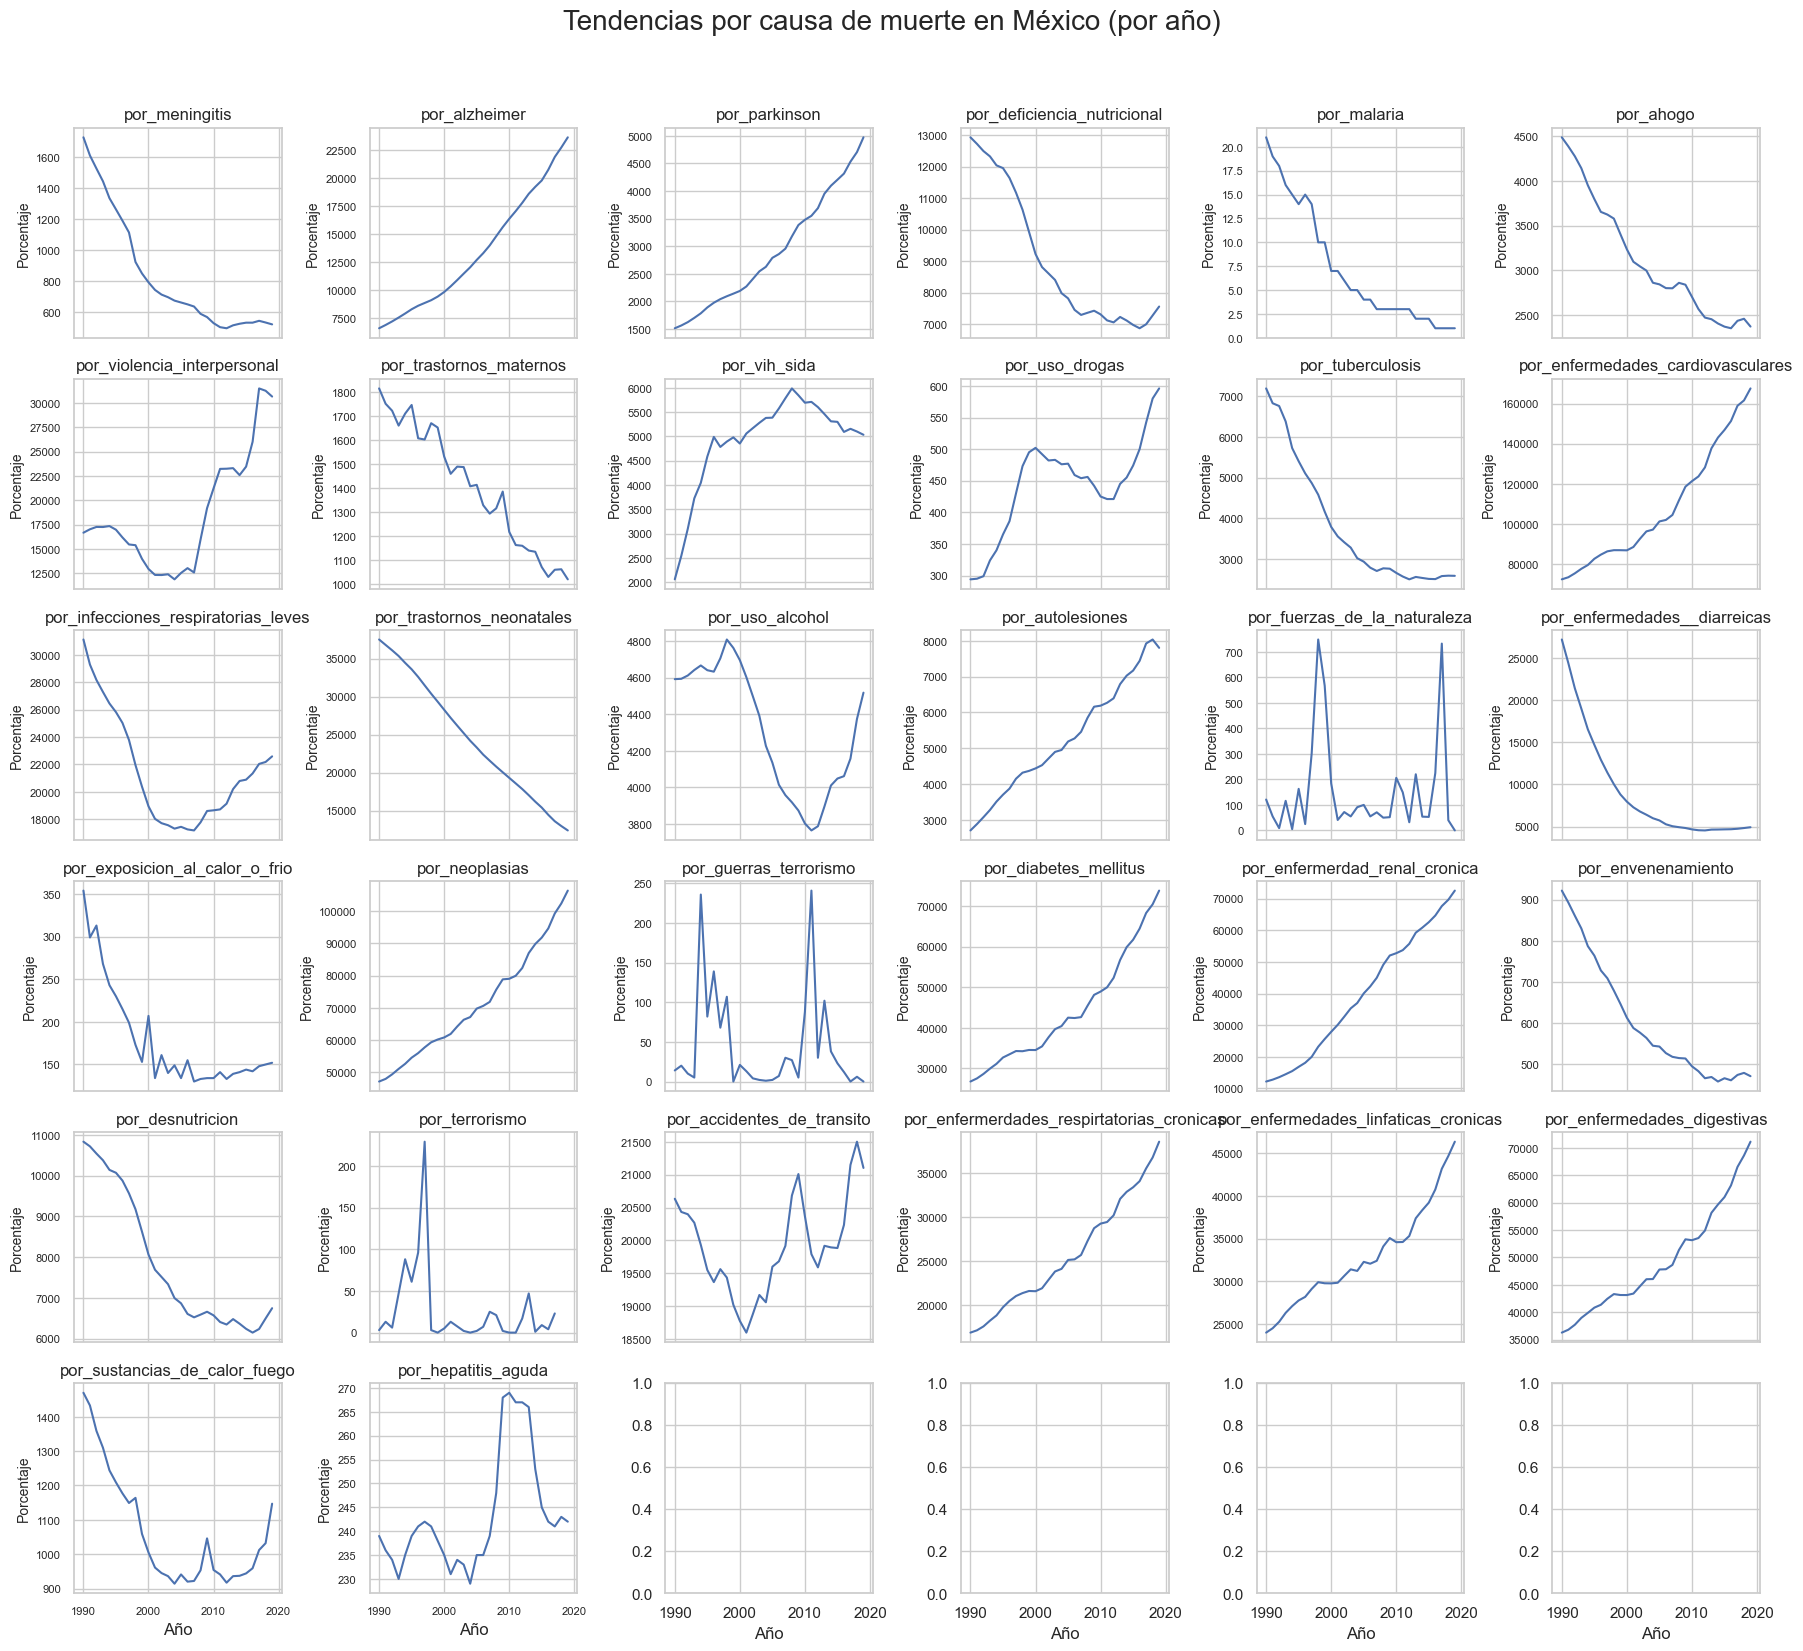

In [4]:
# Filtrar solo datos para México
df_mexico = df_causas_muertes[df_causas_muertes['pais'] == 'Mexico']
df_colombia = df_causas_muertes[df_causas_muertes['pais'] == 'Colombia']

# Establecer el estilo de los gráficos
sns.set(style="whitegrid")

# Crear una figura y ejes para cada enfermedad
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(18, 18), sharex=True)
fig.suptitle('Tendencias por causa de muerte en México (por año)', fontsize=20)

# Lista de enfermedades para iterar
enfermedades = df_causas_muertes.columns[3:]  # Suponiendo que las columnas de enfermedades comienzan desde la cuarta columna
años = df_causas_muertes.columns[3]
# Iterar sobre las enfermedades y crear gráficos de líneas para cada una
for i, enfermedad in enumerate(enfermedades):
    row, col = divmod(i, 6)
    sns.lineplot(data=df_mexico, x='año', y=enfermedad, ax=axes[row, col], legend=False)
    axes[row, col].set_title(enfermedad, fontsize=12)
    axes[row, col].set_xlabel('Año', fontsize=10)
    axes[row, col].set_ylabel('Porcentaje', fontsize=10)
    axes[row, col].tick_params(axis='both', labelsize=8)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.subplots_adjust(bottom=0.1)
for ax in axes[-1]:
    ax.set_xlabel('Año', fontsize=12)
plt.show()


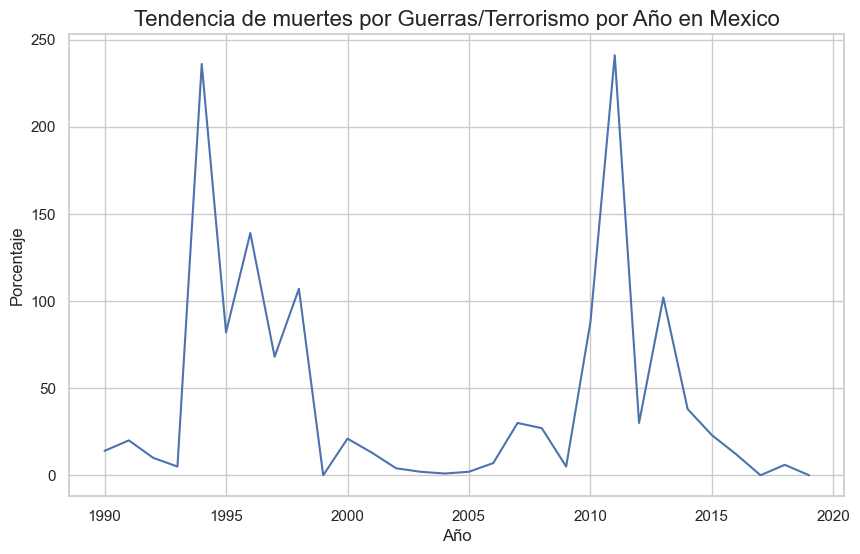

El valor máximo de por_guerras_terrorismo en México es 241.0 en el año 2011


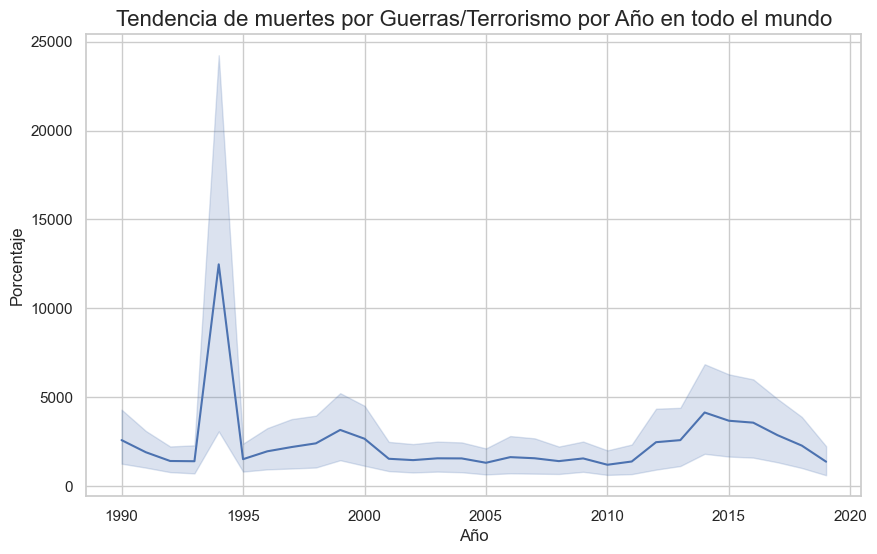

Predicción de muertes por por Guerras/Terrorismo en 2024: 24.60363366703723


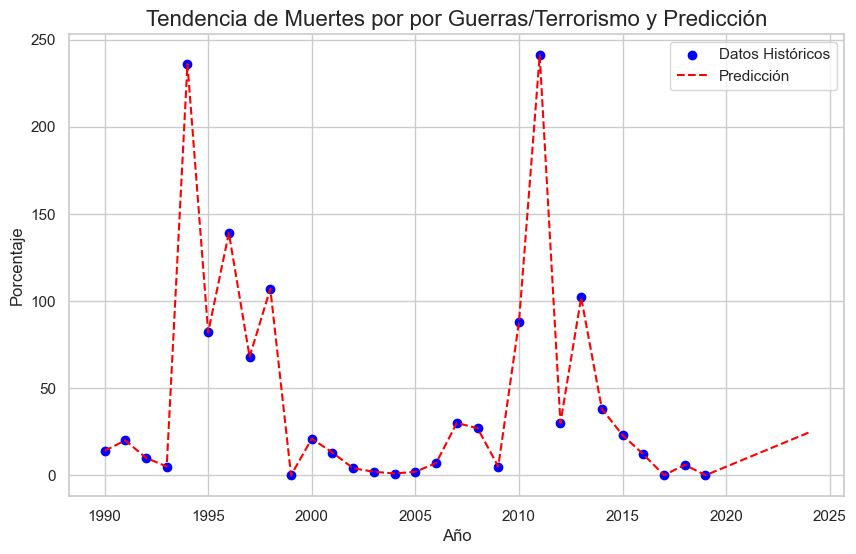

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_mexico, x='año', y='por_guerras_terrorismo')
plt.title('Tendencia de muertes por Guerras/Terrorismo por Año en Mexico', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
plt.show()
# Obtener el índice del valor máximo en la columna 'por_guerras_terrorismo' en México
indice_max_guerras_terrorismo = df_mexico['por_guerras_terrorismo'].idxmax()

# Obtener el año correspondiente al valor máximo
año_max_guerras_terrorismo = df_mexico.loc[indice_max_guerras_terrorismo, 'año']

# Obtener el valor máximo de la columna 'por_guerras_terrorismo' en México
max_valor_guerras_terrorismo = df_mexico['por_guerras_terrorismo'].max()

print(f"El valor máximo de por_guerras_terrorismo en México es {max_valor_guerras_terrorismo} en el año {año_max_guerras_terrorismo}")

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_causas_muertes, x='año', y='por_guerras_terrorismo')
plt.title('Tendencia de muertes por Guerras/Terrorismo por Año en todo el mundo', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
plt.show()


X = df_mexico['año'].values.reshape(-1, 1)
y = df_mexico['por_guerras_terrorismo'].values

# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X, y)

# Predecir el crecimiento en 5 años
año_prediccion = df_mexico['año'].max() + 5
prediccion = modelo.predict([[año_prediccion]])

print(f"Predicción de muertes por por Guerras/Terrorismo en {año_prediccion}: {prediccion[0]}")

# Visualizar la tendencia histórica y la predicción
plt.figure(figsize=(10, 6))
plt.scatter(df_mexico['año'], df_mexico['por_guerras_terrorismo'], color='blue', label='Datos Históricos')
plt.plot(np.concatenate([X, np.array([[año_prediccion]])]), np.concatenate([y, prediccion]), color='red', linestyle='--', label='Predicción')
plt.title('Tendencia de Muertes por por Guerras/Terrorismo y Predicción', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
plt.legend()
plt.show()

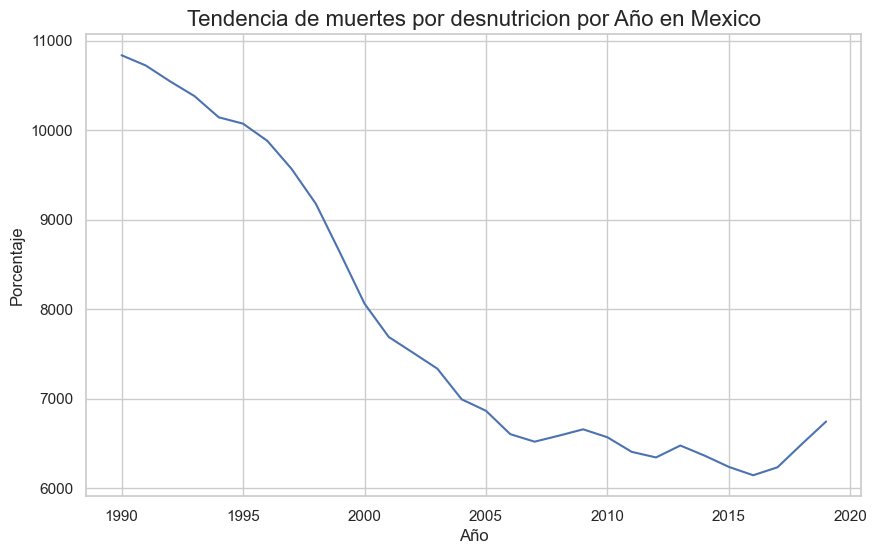

El valor máximo de por desnutricion en México es 10836.0 en el año 1990


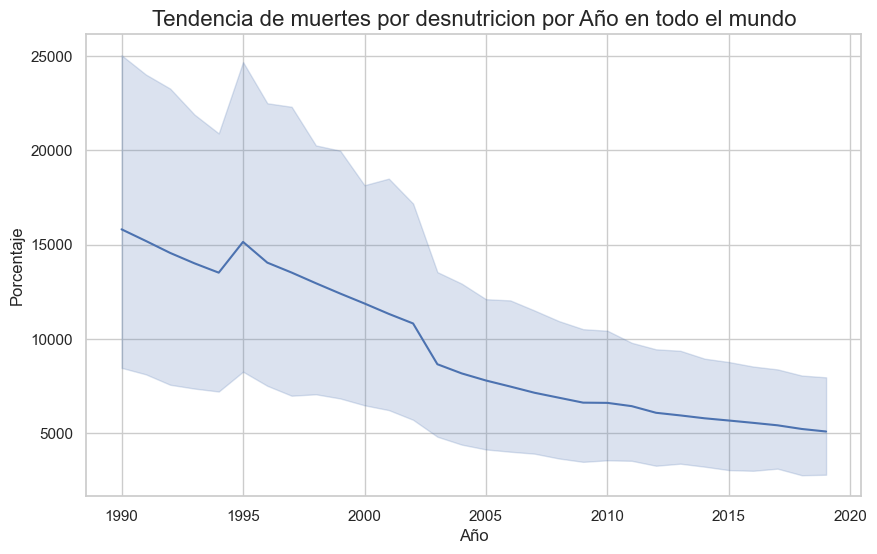

Predicción de muertes por desnutrición en 2024: 4429.995476455311


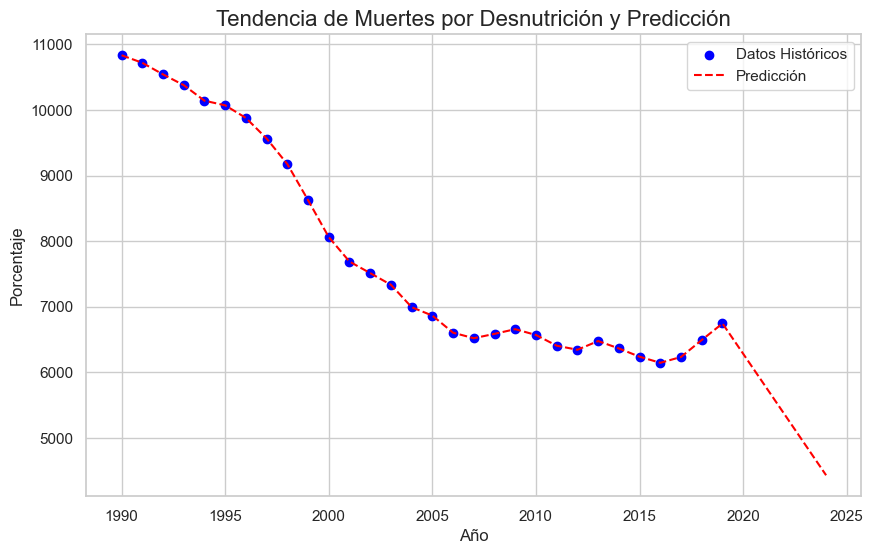

In [6]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_mexico, x='año', y='por_desnutricion')
plt.title('Tendencia de muertes por desnutricion por Año en Mexico', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
plt.show()
# Obtener el índice del valor máximo en la columna 'por_guerras_terrorismo' en México
indice_max_guerras_terrorismo = df_mexico['por_desnutricion'].idxmax()

# Obtener el año correspondiente al valor máximo
año_max_guerras_terrorismo = df_mexico.loc[indice_max_guerras_terrorismo, 'año']

# Obtener el valor máximo de la columna 'por_guerras_terrorismo' en México
max_valor_guerras_terrorismo = df_mexico['por_desnutricion'].max()

print(f"El valor máximo de por desnutricion en México es {max_valor_guerras_terrorismo} en el año {año_max_guerras_terrorismo}")

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_causas_muertes, x='año', y='por_desnutricion')
plt.title('Tendencia de muertes por desnutricion por Año en todo el mundo', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
plt.show()

# Asumiendo que df_desnutricion contiene 'año' y 'por_desnutricion'

# Filtrar solo datos para México (ajusta según tu estructura de datos)

# Preparar los datos para el modelo de regresión
X = df_mexico['año'].values.reshape(-1, 1)
y = df_mexico['por_desnutricion'].values

# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X, y)

# Predecir el crecimiento en 5 años
año_prediccion = df_mexico['año'].max() + 5
prediccion = modelo.predict([[año_prediccion]])

print(f"Predicción de muertes por desnutrición en {año_prediccion}: {prediccion[0]}")

# Visualizar la tendencia histórica y la predicción
plt.figure(figsize=(10, 6))
plt.scatter(df_mexico['año'], df_mexico['por_desnutricion'], color='blue', label='Datos Históricos')
plt.plot(np.concatenate([X, np.array([[año_prediccion]])]), np.concatenate([y, prediccion]), color='red', linestyle='--', label='Predicción')
plt.title('Tendencia de Muertes por Desnutrición y Predicción', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
plt.legend()
plt.show()

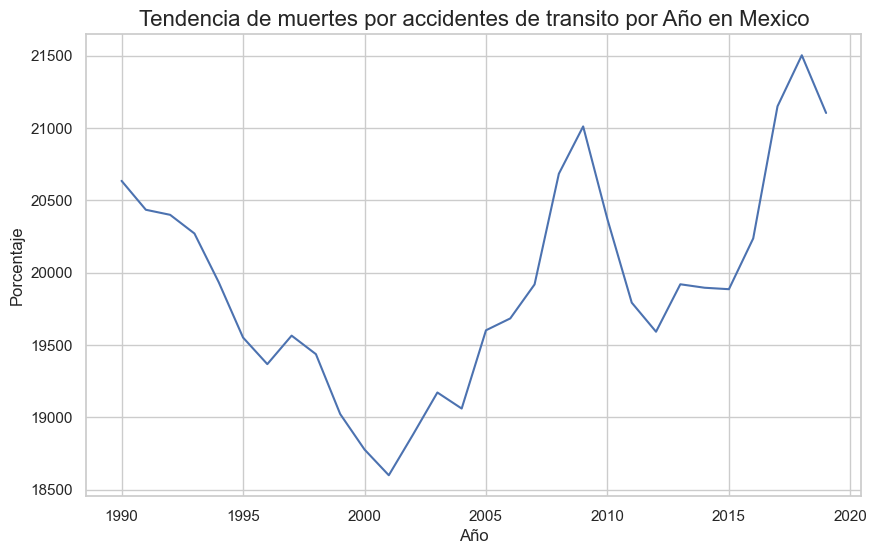

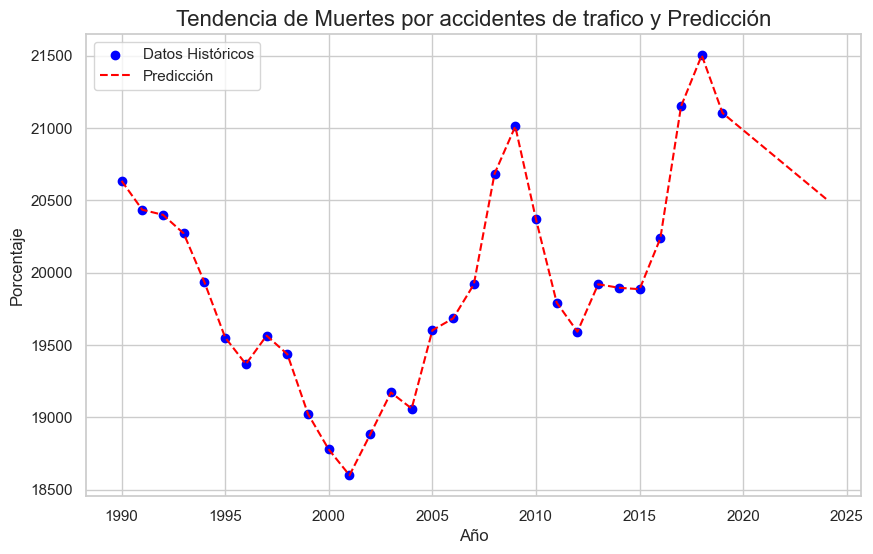

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_mexico, x='año', y='por_accidentes_de_transito')
plt.title('Tendencia de muertes por accidentes de transito por Año en Mexico', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
plt.show()
# Obtener el índice del valor máximo en la columna 'por_guerras_terrorismo' en México
indice_max_accidentes_de_transito = df_mexico['por_accidentes_de_transito'].idxmax()

# Obtener el año correspondiente al valor máximo
año_max_accidentes_de_transito= df_mexico.loc[indice_max_accidentes_de_transito, 'año']

# Obtener el valor máximo de la columna 'por_guerras_terrorismo' en México
max_valor_accidentes_de_transito = df_mexico['por_accidentes_de_transito'].max()

# Preparar los datos para el modelo de regresión
X = df_mexico['año'].values.reshape(-1, 1)
y = df_mexico['por_accidentes_de_transito'].values

# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X, y)

año_prediccion = df_mexico['año'].max() + 5
prediccion = modelo.predict([[año_prediccion]])


# Visualizar la tendencia histórica y la predicción
plt.figure(figsize=(10, 6))
plt.scatter(df_mexico['año'], df_mexico['por_accidentes_de_transito'], color='blue', label='Datos Históricos')
plt.plot(np.concatenate([X, np.array([[año_prediccion]])]), np.concatenate([y, prediccion]), color='red', linestyle='--', label='Predicción')
plt.title('Tendencia de Muertes por accidentes de trafico y Predicción', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
plt.legend()
plt.show()

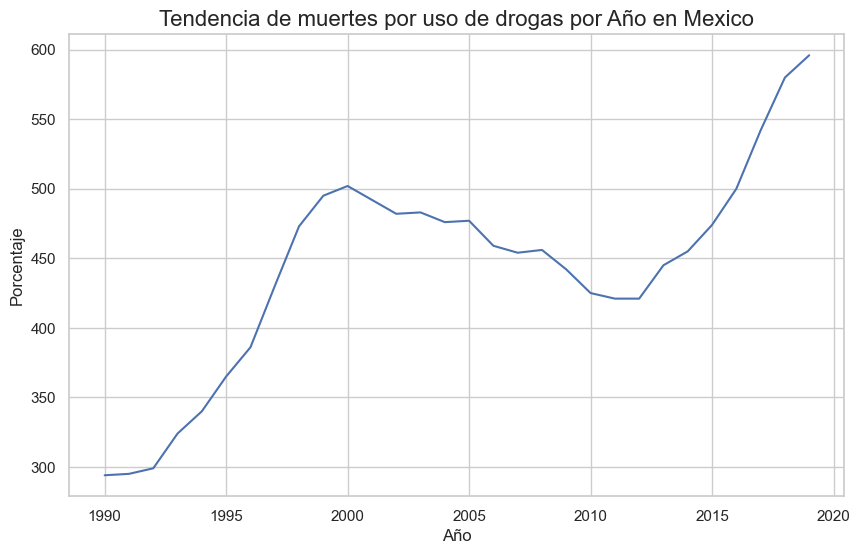

El valor máximo de por uso de drogas en México es 596.0 en el año 2019


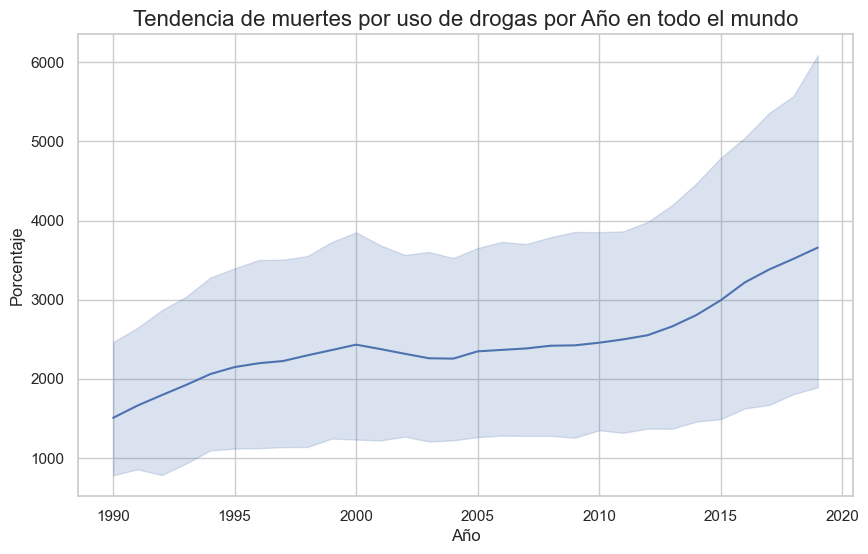

Predicción de muertes por uso de drogas en 2024: 570.8246199480909


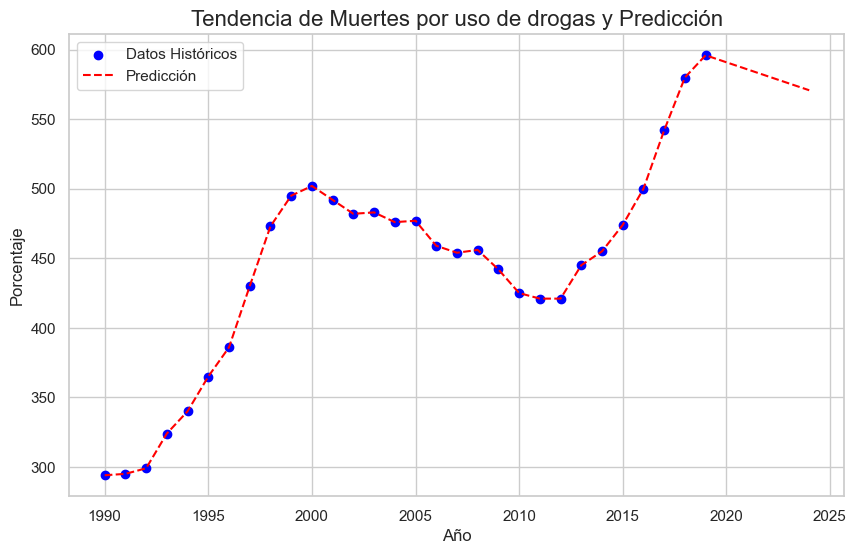

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_mexico, x='año', y='por_uso_drogas')
plt.title('Tendencia de muertes por uso de drogas por Año en Mexico', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
plt.show()
# Obtener el índice del valor máximo en la columna 'por_guerras_terrorismo' en México
indice_max_guerras_terrorismo = df_mexico['por_uso_drogas'].idxmax()

# Obtener el año correspondiente al valor máximo
año_max_guerras_terrorismo = df_mexico.loc[indice_max_guerras_terrorismo, 'año']

# Obtener el valor máximo de la columna 'por_guerras_terrorismo' en México
max_valor_guerras_terrorismo = df_mexico['por_uso_drogas'].max()

print(f"El valor máximo de por uso de drogas en México es {max_valor_guerras_terrorismo} en el año {año_max_guerras_terrorismo}")

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_causas_muertes, x='año', y='por_uso_drogas')
plt.title('Tendencia de muertes por uso de drogas por Año en todo el mundo', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
plt.show()

# Preparar los datos para el modelo de regresión
X = df_mexico['año'].values.reshape(-1, 1)
y = df_mexico['por_uso_drogas'].values

# Crear un modelo de regresión lineal
modelo = LinearRegression()

# Entrenar el modelo
modelo.fit(X, y)

# Predecir el crecimiento en 5 años
año_prediccion = df_mexico['año'].max() + 5
prediccion = modelo.predict([[año_prediccion]])

print(f"Predicción de muertes por uso de drogas en {año_prediccion}: {prediccion[0]}")

# Visualizar la tendencia histórica y la predicción
plt.figure(figsize=(10, 6))
plt.scatter(df_mexico['año'], df_mexico['por_uso_drogas'], color='blue', label='Datos Históricos')
plt.plot(np.concatenate([X, np.array([[año_prediccion]])]), np.concatenate([y, prediccion]), color='red', linestyle='--', label='Predicción')
plt.title('Tendencia de Muertes por uso de drogas y Predicción', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
plt.legend()
plt.show()